# **FACE DETECTION USING PRETRAINED YOLO**

In [8]:
from glob import glob

In [21]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/archive (4).zip'
extract_to_path = '/content/'

os.makedirs(extract_to_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)


In [ ]:
# This Python script **converts Pascal VOC XML annotations to YOLO format** for object detection. Below is a detailed breakdown of how it works.

# ---

# ## **1️⃣ Overview**
# - **Pascal VOC format** uses XML files for bounding boxes.
# - **YOLO format** represents bounding boxes in a `.txt` file with normalized coordinates.
# - The script:
#   1. Reads XML files.
#   2. Extracts bounding box information.
#   3. Converts it to YOLO format.
#   4. Saves the results in a `labels/` folder.

# ---

In [ ]:


# ## **2️⃣ Function Breakdown**
# ### **🔹 `voc_to_yolo_format(xml_file, image_width, image_height, class_mapping)`**
# **📌 Purpose:** Converts a single XML annotation file to YOLO format.

# ### **👉 Step-by-Step Explanation**
# ```python
# tree = ET.parse(xml_file)
# root = tree.getroot()
# ```
# - Parses the XML file and extracts the root element.

# ```python
# yolo_annotations = []
# for obj in root.iter('object'):
#     class_name = obj.find('name').text
#     class_id = class_mapping.get(class_name, -1)

#     if class_id == -1:
#         continue
# ```
# - Loops through each object in the XML file.
# - Extracts the **class name** and finds its corresponding **ID** in `class_mapping` (`-1` means unknown class, so it's skipped).

# ```python
# bbox = obj.find('bndbox')
# xmin = int(bbox.find('xmin').text)
# ymin = int(bbox.find('ymin').text)
# xmax = int(bbox.find('xmax').text)
# ymax = int(bbox.find('ymax').text)
# ```
# - Extracts bounding box coordinates.

# ```python
# x_center = (xmin + xmax) / 2 / image_width
# y_center = (ymin + ymax) / 2 / image_height
# width = (xmax - xmin) / image_width
# height = (ymax - ymin) / image_height
# ```
# - Converts absolute coordinates to **YOLO format** (normalized values from `0 to 1`).

# ```python
# yolo_annotations.append(f"{class_id} {x_center} {y_center} {width} {height}")
# ```
# - Stores the **converted annotation** as a formatted string.

# 🔹 **Example Output for One Object in YOLO Format:**
# ```
# 0 0.5 0.5 0.3 0.2
# ```
# *(Class 0, bounding box centered at (0.5,0.5) with width 0.3 and height 0.2)*

# ---

In [ ]:


# ### **🔹 `convert_voc_to_yolo(dataset_path, image_folder, annotations_folder, class_mapping)`**
# **📌 Purpose:** Converts all XML files in a dataset.

# ```python
# image_files = os.listdir(image_folder)
# os.makedirs(os.path.join(dataset_path, 'labels'), exist_ok=True)
# ```
# - **Gets all image filenames**.
# - **Creates a `labels/` folder** if it doesn’t exist.

# ```python
# for image_file in image_files:
#     if image_file.endswith('.jpg') or image_file.endswith('.png'):
#         xml_file = os.path.join(annotations_folder, image_file.replace('.jpg', '.xml').replace('.png', '.xml'))
# ```
# - **Finds the corresponding XML file** for each image.

# ```python
# if os.path.exists(xml_file):
#     image_path = os.path.join(image_folder, image_file)
#     image = cv2.imread(image_path)
#     image_height, image_width, _ = image.shape
# ```
# - **Loads the image** to get its dimensions (needed for normalization).

# ```python
# yolo_annotations = voc_to_yolo_format(xml_file, image_width, image_height, class_mapping)
# ```
# - **Converts XML annotations** to YOLO format.

# ```python
# txt_file = os.path.join(dataset_path, 'labels', image_file.replace('.jpg', '.txt').replace('.png', '.txt'))
# with open(txt_file, 'w') as f:
#     f.write("\n".join(yolo_annotations))
# ```
# - **Saves YOLO annotations** in a `.txt` file.

# ---

In [ ]:


# ## **3️⃣ Example Walkthrough**
# ### **📌 Given XML File (`image1.xml`)**
# ```xml
# <annotation>
#     <object>
#         <name>with_mask</name>
#         <bndbox>
#             <xmin>50</xmin>
#             <ymin>60</ymin>
#             <xmax>200</xmax>
#             <ymax>220</ymax>
#         </bndbox>
#     </object>
# </annotation>
# ```

# ### **📌 Given Image (`image1.jpg`)**
# - **Size:** 400 × 400 pixels

# ### **📌 Class Mapping**
# ```python
# class_mapping = {'with_mask': 0, 'without_mask': 1, 'mask_weared_incorrect': 2}
# ```
# - `"with_mask"` is **class 0**.

# ---

# ### **🔹 Step 1: Convert Bounding Box**
# **XML Bounding Box:**
# ```
# xmin = 50, ymin = 60, xmax = 200, ymax = 220
# ```

# **Convert to YOLO Format:**
# ```
# x_center = (50 + 200) / 2 / 400 = 0.3125
# y_center = (60 + 220) / 2 / 400 = 0.35
# width = (200 - 50) / 400 = 0.375
# height = (220 - 60) / 400 = 0.4
# ```

# ---

# ### **🔹 Step 2: Output YOLO Annotation**
# **Saved in `labels/image1.txt`:**
# ```
# 0 0.3125 0.35 0.375 0.4
# ```
# *(Class 0, center at (0.3125,0.35), width 0.375, height 0.4)*

# ---


In [ ]:

# ## **4️⃣ Running the Code**
# ```python
# # Define dataset paths
# dataset_path = '/content/Face_detection'
# image_folder = '/content/Face_detection/images'
# annotations_folder = '/content/Face_detection/annotations'

# # Define class mapping
# class_mapping = {'with_mask': 0, 'without_mask': 1, 'mask_weared_incorrect': 2}

# # Convert Pascal VOC to YOLO format
# convert_voc_to_yolo(dataset_path, image_folder, annotations_folder, class_mapping)
# ```

# ---

# ## **5️⃣ Final Folder Structure**
# After running the script:
# ```
# /Face_detection
#   ├── images
#   │   ├── image1.jpg
#   │   ├── image2.jpg
#   ├── annotations
#   │   ├── image1.xml
#   │   ├── image2.xml
#   ├── labels  <-- (Generated)
#   │   ├── image1.txt
#   │   ├── image2.txt
# ```
# ---

# ## **✅ Summary**
# - The script **converts Pascal VOC XML to YOLO format**.
# - It **normalizes bounding boxes** based on image size.
# - It **saves results in a `labels/` folder** as `.txt` files.

# **🚀 Next Step: Train a YOLO Model**
# ```bash
# yolo train model=yolov8n.pt data=/content/Face_detection/dataset.yaml epochs=50 imgsz=640
# ```

# Would you like help with **training YOLO** or **verifying annotation results**? 😊

In [25]:
import xml.etree.ElementTree as ET
import os
import cv2

def voc_to_yolo_format(xml_file, image_width, image_height, class_mapping):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    yolo_annotations = []

    for obj in root.iter('object'):
        class_name = obj.find('name').text
        class_id = class_mapping.get(class_name, -1)

        if class_id == -1:
            continue

        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        x_center = (xmin + xmax) / 2 / image_width
        y_center = (ymin + ymax) / 2 / image_height
        width = (xmax - xmin) / image_width
        height = (ymax - ymin) / image_height

        yolo_annotations.append(f"{class_id} {x_center} {y_center} {width} {height}")

    return yolo_annotations

def convert_voc_to_yolo(dataset_path, image_folder, annotations_folder, class_mapping):
    image_files = os.listdir(image_folder)

    os.makedirs(os.path.join(dataset_path, 'labels'), exist_ok=True)

    for image_file in image_files:
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            xml_file = os.path.join(annotations_folder, image_file.replace('.jpg', '.xml').replace('.png', '.xml'))

            if os.path.exists(xml_file):
                image_path = os.path.join(image_folder, image_file)
                image = cv2.imread(image_path)
                image_height, image_width, _ = image.shape

                yolo_annotations = voc_to_yolo_format(xml_file, image_width, image_height, class_mapping)
                txt_file = os.path.join(dataset_path, 'labels', image_file.replace('.jpg', '.txt').replace('.png', '.txt'))
                with open(txt_file, 'w') as f:
                    f.write("\n".join(yolo_annotations))

class_mapping = {'with_mask' : 0, 'without_mask':1,'mask_weared_incorrect':2}
dataset_path = '/content/Face_detection'
image_folder = '/content/Face_detection/images'
annotations_folder = '/content/Face_detection/annotations'

convert_voc_to_yolo(dataset_path, image_folder, annotations_folder, class_mapping)


Installing some libraries

In [12]:
# Install necessary libraries
!pip install torch torchvision torchaudio
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [37]:
# Create dataset.yaml file for YOLOv5
yaml_content = """
train: /content/Face_detection/images
val: /content/Face_detection/images

nc: 3  # Number of classes (with_mask, without_mask,mask_weared_incorrect)
names: ['with_mask', 'without_mask','mask_weared_incorrect']
"""

with open('/content/dataset.yaml', 'w') as f:
    f.write(yaml_content)

In [31]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 41.6 MB/s eta 0:00:00


In [33]:
!git clone https://github.com/ultralytics/yolov5.git /content/yolov5

Cloning into '/content/yolov5'...
remote: Enumerating objects: 17279, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 17279 (delta 3), reused 0 (delta 0), pack-reused 17270 (from 3)
Receiving objects: 100% (17279/17279), 16.14 MiB | 28.99 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.


YOLO FOLDER INSTALLING

In [34]:
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5


In [38]:
!ls /content/yolov5

benchmarks.py	 data	     LICENSE	     README.md	       segment	       val.py
CITATION.cff	 detect.py   models	     README.zh-CN.md   train.py        yolov5s.pt
classify	 export.py   __pycache__     requirements.txt  tutorial.ipynb
CONTRIBUTING.md  hubconf.py  pyproject.toml  runs	       utils


Training With help of yolov5 train.py

In [39]:
!python3 /content/yolov5/train.py --img 640 --batch 16 --epochs 10 --data /content/dataset.yaml --weights yolov5s.pt --cache --no-wandb

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-03-23 05:44:50.227627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742708690.260795   16236 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742708690.271240   16236 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&

EVALUATION


In [43]:
!python3 /content/yolov5/val.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --data /content/dataset.yaml --img 640 --task val

val: data=/content/dataset.yaml, weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/Face_detection/labels.cache... 853 images, 0 backgrounds, 0 corrupt: 100% 853/853 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:  37% 10/27 [00:10<00:13,  1.23it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 27/27 [00:19<00:00,  

TESTING WITH AN IMAGE ~ Results saved to runs/detect/exp

In [46]:
import cv2
from matplotlib import pyplot as plt
from IPython.display import Image
from ultralytics import YOLO

In [60]:
!python3 /content/yolov5/detect.py --weights  /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --source /content/download.jpeg

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/download.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/download.jpeg: 416x640 1 with_mask, 28.7ms
Speed: 0.5ms pre-process, 28.7ms inference, 159.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


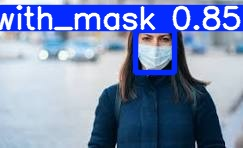

In [62]:
img = cv2.imread('/content/yolov5/runs/detect/exp2/download.jpeg')
from google.colab.patches import cv2_imshow

cv2_imshow(img)

In [63]:
!python3 /content/yolov5/detect.py --weights  /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --source /content/download.jpeg

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/download.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/download.jpeg: 640x640 (no detections), 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 10.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


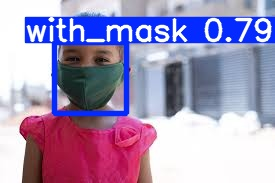

In [70]:
img = cv2.imread('/content/yolov5/runs/detect/exp4/i2.jpeg')
from google.colab.patches import cv2_imshow

cv2_imshow(img)

In [72]:
!python3 /content/yolov5/detect.py --weights  /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --source /content/images.jpeg

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/images.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/images.jpeg: 640x640 1 without_mask, 11.4ms
Speed: 0.6ms pre-process, 11.4ms inference, 129.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


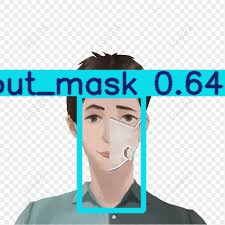

In [74]:
img = cv2.imread('/content/yolov5/runs/detect/exp6/images.jpeg')
from google.colab.patches import cv2_imshow

cv2_imshow(img)

In [87]:
!python3 /content/yolov5/detect.py --weights  /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --source /content/Shri_Konidela_Pawan_Kalyan.jpg

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/Shri_Konidela_Pawan_Kalyan.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Shri_Konidela_Pawan_Kalyan.jpg: 640x608 1 without_mask, 48.2ms
Speed: 0.7ms pre-process, 48.2ms inference, 182.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp13


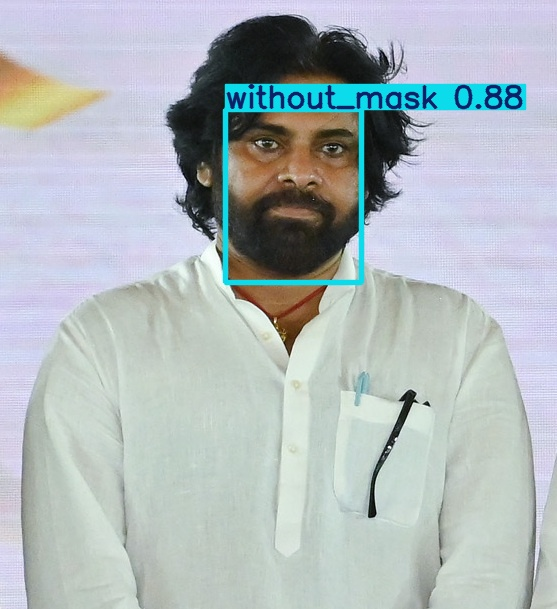

In [88]:
img = cv2.imread('/content/yolov5/runs/detect/exp13/Shri_Konidela_Pawan_Kalyan.jpg')
from google.colab.patches import cv2_imshow

cv2_imshow(img)